<a href="https://colab.research.google.com/github/amey-joshi/am/blob/master/am/pde/fenics_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fenics

In [0]:
!apt-get install software-properties-common
!add-apt-repository ppa:fenics-packages/fenics
!apt-get update
!apt-get install --no-install-recommends fenics

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


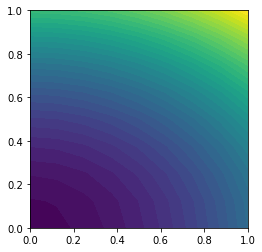

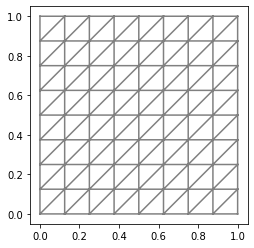

In [5]:
from fenics import *
import matplotlib.pyplot as plt

mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree = 2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a == L, u, bc)

plot(u)
plt.show()
plot(mesh)
plt.show()